## Title : Titanic - Machine Learning from Disaster
### Problem Statement : To create a model that predict which passengers survived the Titanic shipwreck.

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Explore Dataset

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv("../input/titanic/test.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check for Null Values

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observations : 
    1. There are total 891 passengers 
    2. Age of passengers ranges from 0.4 to 80 and Average age is 30
    3. 687 records are missing for 'Cabin' feature which contributes around 77%.Hence, we will remove that variable.
    4. I think 'Age' is an important feature while predicting survival rate.Around 20% values are missing.Fill missing values by Median Age
    5. 'Passenger_ID','Ticket','Name' does not contribute much for survival prediction.Hence removing these columns
    6. For 'Embarked' Feature,Only 2 values are missing . Hence it should not be a problem.

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Fill Null Values for Age Feature in train and test dataset

In [7]:
# For Train
median_1 = train['Age'].median()
train['Age'].fillna(median_1,inplace = True)

# For Test
median_2 = test['Age'].median()
test['Age'].fillna(median_2,inplace = True)

Fill Null Values for Embarked Feature in Train Dataset

In [8]:
a = train['Embarked'].value_counts()
print("Embarked Count:\n", a)
train[train['Embarked'].isnull()]

Embarked Count:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


As Most of the records embarked at port S, Filling missing values for two records with values S

In [9]:
train['Embarked'].fillna('S',inplace = True)

In [10]:
print("Count of Missing value for Fare Feature in Test Data: ",test['Fare'].isnull().sum())
test[test['Fare'].isnull()]

Count of Missing value for Fare Feature in Test Data:  1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


One Record is missing for 'Fare' Feature in test dataset.The records missing is of class 3 Hence we fill missing value with mean value of that particular class i.e. class 3

In [11]:
mean_fare = test[test['Pclass'] == 3]['Fare'].mean()
test['Fare'].fillna(mean_fare,inplace = True)

Removing unnecessary variables :

In [12]:
Id = test['PassengerId']
train = train.drop(['PassengerId','Cabin','Ticket','Name'],axis = 1)
test = test.drop(['PassengerId','Cabin','Ticket','Name'],axis = 1)

In [13]:
print("Check of Null Values for Train Dataset : \n",train.isnull().sum())

Check of Null Values for Train Dataset : 
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [14]:
print("Check of Null Values for Test Dataset : \n",test.isnull().sum())

Check of Null Values for Test Dataset : 
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### Data Visualization

Text(0.5, 1.0, 'Distribution of People by Embarked')

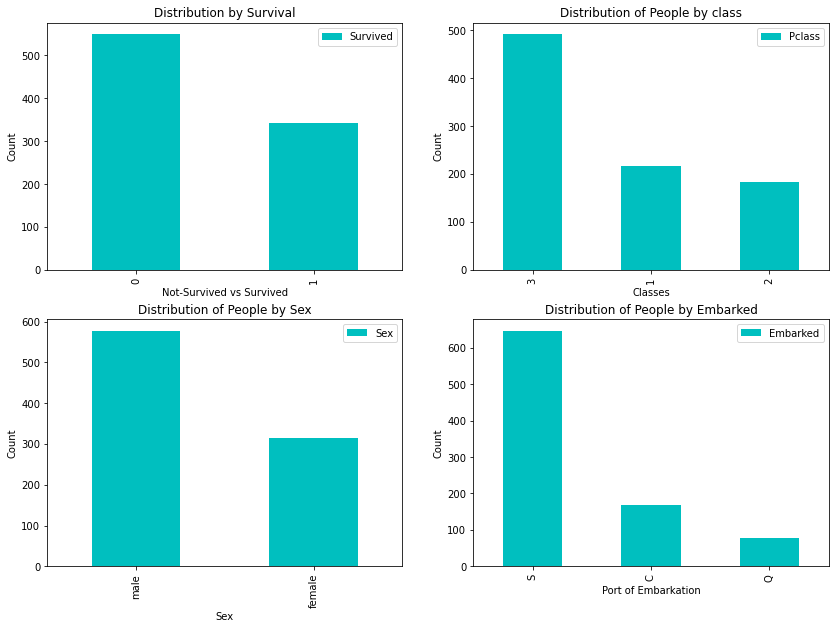

In [15]:
plt.figure(figsize=[14,10])

plt.subplot(221)
train['Survived'].value_counts().plot(kind = 'bar',color = 'c',legend = True)
plt.xlabel("Not-Survived vs Survived")
plt.ylabel("Count")
plt.title("Distribution by Survival")

plt.subplot(222)
train['Pclass'].value_counts().plot(kind = 'bar',color = 'c',legend = True)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Distribution of People by class")

plt.subplot(223)
train['Sex'].value_counts().plot(kind = 'bar',color = 'c',legend = True)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of People by Sex")

plt.subplot(224)
train['Embarked'].value_counts().plot(kind = 'bar',color = 'c',legend = True)
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.title("Distribution of People by Embarked")

Text(0.5, 1.0, 'Survival Distribution by Sex')

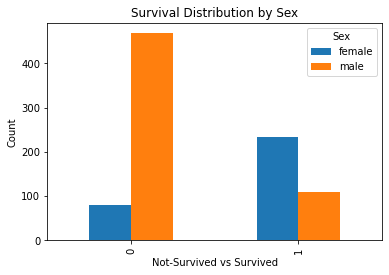

In [16]:
grp_sex = train.groupby('Survived')['Sex'].value_counts()
grp_sex.unstack().plot(kind = 'bar')
plt.xlabel("Not-Survived vs Survived")
plt.ylabel("Count")
plt.title("Survival Distribution by Sex")

Observation : Female have higher chances of Survival

Text(0.5, 1.0, 'Distribution by Age')

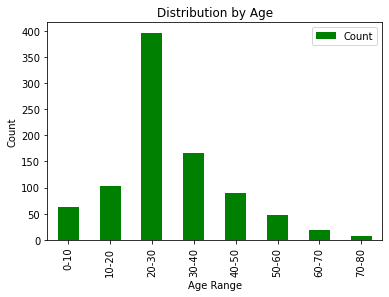

In [17]:
age_0_10 = train[train['Age'] < 10]['Age'].count()
age_10_20 = train[(train['Age'] >= 10) & (train['Age'] < 20) ]['Age'].count()
age_20_30 = train[(train['Age'] >= 20) & (train['Age'] < 30) ]['Age'].count()
age_30_40 = train[(train['Age'] >= 30) & (train['Age'] < 40) ]['Age'].count()
age_40_50 = train[(train['Age'] >= 40) & (train['Age'] < 50) ]['Age'].count()
age_50_60 = train[(train['Age'] >= 50) & (train['Age'] < 60) ]['Age'].count()
age_60_70 = train[(train['Age'] >= 60) & (train['Age'] < 70) ]['Age'].count()
age_70_80 = train[(train['Age'] >= 70) & (train['Age'] <= 80) ]['Age'].count()

Age_dist = [age_0_10,age_10_20,age_20_30,age_30_40,age_40_50,age_50_60,age_60_70,age_70_80]
Age_graph = pd.DataFrame({'Age Range':['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'],'Count' : Age_dist})

Age_graph.set_index('Age Range',inplace = True)

Age_graph.plot(kind = 'bar',color = 'g')

#plt.pie(Age_graph['Count'],labels = Age_graph['Age Range'])
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.title("Distribution by Age")

Observation : There are more number of people in the range 20-30

Text(0.5, 1.0, 'Survival Distribution by Class')

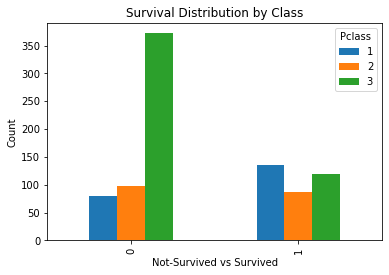

In [18]:
grp_class = train.groupby('Survived')['Pclass'].value_counts()
grp_class.unstack().plot(kind = 'bar')
plt.xlabel("Not-Survived vs Survived")
plt.ylabel("Count")
plt.title("Survival Distribution by Class")

Observation : People from class 1 have higher chances of survival and People from class 3 have less chances of survival

Text(0.5, 1.0, 'Survival Distribution by Embarked')

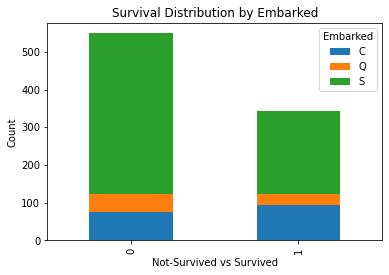

In [19]:
grp_emb = train.groupby('Survived')['Embarked'].value_counts()
grp_emb.unstack().plot(kind = 'bar',stacked = True)
plt.xlabel("Not-Survived vs Survived")
plt.ylabel("Count")
plt.title("Survival Distribution by Embarked")

Observation :  Most of the people are embarked at port 'S'

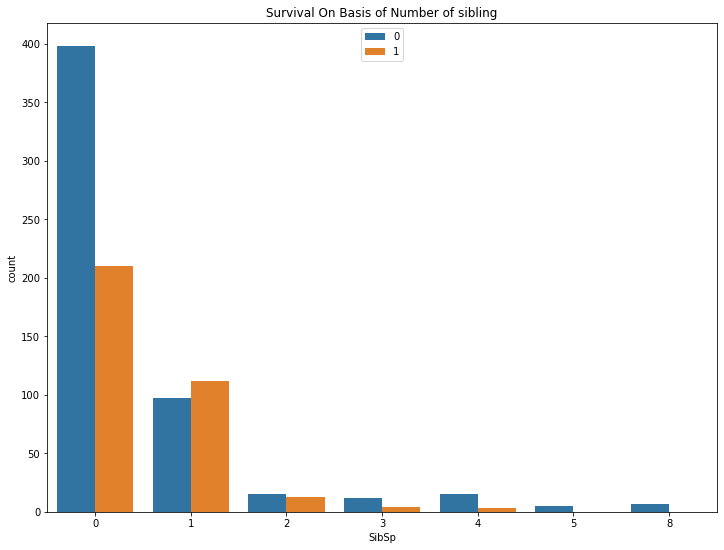

In [20]:
plt.figure(figsize=(12,9))
sns.countplot(x="SibSp", hue="Survived", data=train)
plt.title("Survival On Basis of Number of sibling")
plt.legend(loc='best')

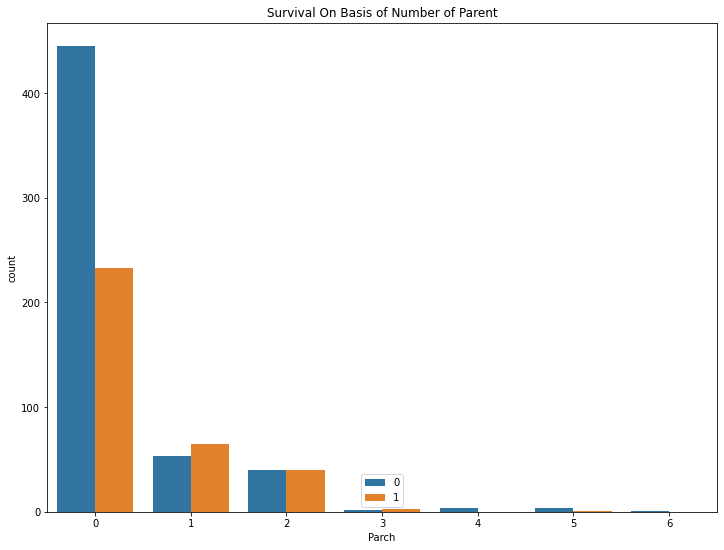

In [21]:
plt.figure(figsize=(12,9))
sns.countplot(x="Parch", hue="Survived", data=train)
plt.title("Survival On Basis of Number of Parent")
plt.legend()

Text(0.5, 1.0, 'Survival Distribution by Age Ranges')

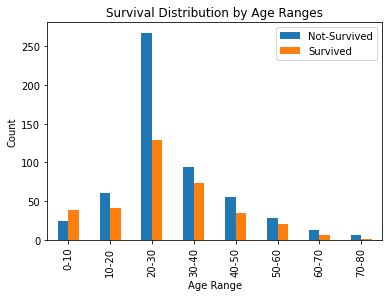

In [22]:
age_0_10 = train[train['Age'] < 10]
age_10_20 = train[(train['Age'] >= 10) & (train['Age'] < 20) ]
age_20_30 = train[(train['Age'] >= 20) & (train['Age'] < 30) ]
age_30_40 = train[(train['Age'] >= 30) & (train['Age'] < 40) ]
age_40_50 = train[(train['Age'] >= 40) & (train['Age'] < 50) ]
age_50_60 = train[(train['Age'] >= 50) & (train['Age'] < 60) ]
age_60_70 = train[(train['Age'] >= 60) & (train['Age'] < 70) ]
age_70_80 = train[(train['Age'] >= 70) & (train['Age'] <= 80) ]

x1 = age_0_10.groupby('Age')['Survived'].value_counts().rename('Count').reset_index()
a1 = x1[x1['Survived'] == 0]['Count'].sum()
b1 = x1[x1['Survived'] == 1]['Count'].sum()

x2 = age_10_20.groupby('Age')['Survived'].value_counts().rename('Count').reset_index()
a2 = x2[x2['Survived'] == 0]['Count'].sum()
b2 = x2[x2['Survived'] == 1]['Count'].sum()

x3 = age_20_30.groupby('Age')['Survived'].value_counts().rename('Count').reset_index()
a3 = x3[x3['Survived'] == 0]['Count'].sum()
b3 = x3[x3['Survived'] == 1]['Count'].sum()

x4 = age_30_40.groupby('Age')['Survived'].value_counts().rename('Count').reset_index()
a4 = x4[x4['Survived'] == 0]['Count'].sum()
b4 = x4[x4['Survived'] == 1]['Count'].sum()

x5 = age_40_50.groupby('Age')['Survived'].value_counts().rename('Count').reset_index()
a5 = x5[x5['Survived'] == 0]['Count'].sum()
b5 = x5[x5['Survived'] == 1]['Count'].sum()

x6 = age_50_60.groupby('Age')['Survived'].value_counts().rename('Count').reset_index()
a6 = x6[x6['Survived'] == 0]['Count'].sum()
b6 = x6[x6['Survived'] == 1]['Count'].sum()

x7 = age_60_70.groupby('Age')['Survived'].value_counts().rename('Count').reset_index()
a7 = x7[x7['Survived'] == 0]['Count'].sum()
b7 = x7[x7['Survived'] == 1]['Count'].sum()

x8 = age_70_80.groupby('Age')['Survived'].value_counts().rename('Count').reset_index()
a8 = x8[x8['Survived'] == 0]['Count'].sum()
b8 = x8[x8['Survived'] == 1]['Count'].sum()

Age_distribution = pd.DataFrame({'Age Range':['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'],
                         'Not-Survived' : [a1,a2,a3,a4,a5,a6,a7,a8],'Survived' : [b1,b2,b3,b4,b5,b6,b7,b8]})
Age_distribution.set_index('Age Range',inplace = True)
Age_distribution.plot(kind = 'bar')
plt.ylabel("Count")
plt.title("Survival Distribution by Age Ranges")

Convert Features into Numerical Values

In [23]:
#Mapping
sex_map = {'male':0,'female': 1}
train['Sex'] = train['Sex'].map(sex_map)
test['Sex'] = test['Sex'].map(sex_map)

In [24]:
embarked_map = {'S':1,'C':2,'Q':3}
train['Embarked'] = train['Embarked'].map(embarked_map)
test['Embarked'] = test['Embarked'].map(embarked_map)

In [25]:
#Check if all values are numerical or not
train.head()
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,3
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,3
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1


### Implement Machine Learning Algorithms

In [26]:
X = train.drop(['Survived'],axis = 1)
y = train['Survived']

Split into Train and Test data   
Train = 70 % and Test = 30%

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

Import Necessary Libraries

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

1. Logistic Regression Algorithm

In [29]:
LR = LogisticRegression(solver = 'lbfgs')
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
LR_Score = accuracy_score(y_pred,y_test)
print("Accuracy Using Naive Bayes : ", LR_Score)

Accuracy Using Naive Bayes :  0.7798507462686567


2. Gaussian Naive Bayes Algorithm

In [30]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
GB_Score = accuracy_score(y_pred,y_test)
print("Accuracy Using Logistic Regression : ", GB_Score)

Accuracy Using Logistic Regression :  0.7798507462686567


3. Decision Tree Algorithm

In [31]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
DT_Score = accuracy_score(y_pred,y_test)
print("Accuracy Using Decision Tree : ",DT_Score)

Accuracy Using Decision Tree :  0.7611940298507462


4. Random Forest Algorithm

In [32]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
RF_Score = accuracy_score(y_pred,y_test)
print("Accuracy Using Random Forest : ",RF_Score)

Accuracy Using Random Forest :  0.7910447761194029


5. Random Forest

In [33]:
'''
from sklearn.model_selection import GridSearchCV
params = {'n_estimators' : [50,100,200,500,750],
         'max_depth' : [3,4,5,7,10],
         'colsample_bytree':[i/10.0 for i in range(6,10)],
         'learning_rate' : [0.01, 0.05,0.1,0.4,0.5,0.55],
         'min_child_weight' : [1],
         'gamma':[i/10.0 for i in range(6,10)],
         'subsample' : [0.8,0.9,1],
         }

G_search = GridSearchCV(estimator = XGBClassifier(), 
                       param_grid = params,
                       scoring = 'accuracy')
                       
G_search.fit(X_train,y_train)

G_search.best_params_
'''

"\nfrom sklearn.model_selection import GridSearchCV\nparams = {'n_estimators' : [50,100,200,500,750],\n         'max_depth' : [3,4,5,7,10],\n         'colsample_bytree':[i/10.0 for i in range(6,10)],\n         'learning_rate' : [0.01, 0.05,0.1,0.4,0.5,0.55],\n         'min_child_weight' : [1],\n         'gamma':[i/10.0 for i in range(6,10)],\n         'subsample' : [0.8,0.9,1],\n         }\n\nG_search = GridSearchCV(estimator = XGBClassifier(), \n                       param_grid = params,\n                       scoring = 'accuracy')\n                       \nG_search.fit(X_train,y_train)\n\nG_search.best_params_\n"

In [34]:
xg_boost = XGBClassifier(colsample_bytree= 0.6,
 gamma= 0.7,
 learning_rate= 0.05,
 max_depth= 7,
 min_child_weight= 1,
 n_estimators= 100,
 subsample= 1)

xg_boost.fit(X_train, y_train)
pred = xg_boost.predict(X_test)
XG_score = accuracy_score(y_pred,y_test)

In [35]:
#XG_score = G_search.best_score_
print("Accuracy Using XGBoost with parameters tuned : ", XG_score)

Accuracy Using XGBoost with parameters tuned :  0.7910447761194029


In [36]:
Results = pd.DataFrame({'Model': ['Logistic Regression','Gaussian Naive Bayes','Decision Tree','Random Forest','XGBoost'],
                        'Accuracy Score' : [LR_Score,GB_Score,DT_Score,RF_Score,XG_score]})

In [37]:
Results

,Model,Accuracy Score
0,Logistic Regression,0.779851
1,Gaussian Naive Bayes,0.779851
2,Decision Tree,0.761194
3,Random Forest,0.791045
4,XGBoost,0.791045


In [38]:
Final_Results = Results.sort_values(by = 'Accuracy Score', ascending=False)
Final_Results = Final_Results.set_index('Model')
print(Final_Results)

                      Accuracy Score
Model                               
Random Forest               0.791045
XGBoost                     0.791045
Logistic Regression         0.779851
Gaussian Naive Bayes        0.779851
Decision Tree               0.761194


In [39]:
Predictions = xg_boost.predict(test)
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : Id, 'Survived': Predictions })
output.to_csv('submission.csv', index=False)